In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


## Problem Statement

## Data Gathering

In [12]:
df = pd.read_csv('weather-prediction.csv')
df

GMT  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0    01-01-2015                12                  8                 4   
1    02-01-2015                11                  7                 4   
2    03-01-2015                 6                  4                 2   
3    04-01-2015                 3                  1                -2   
4    05-01-2015                10                  6                 2   
..          ...               ...                ...               ...   
665  27-10-2016                16                 12                 8   
666  28-10-2016                17                 13                10   
667  29-10-2016                15                 13                11   
668  30-10-2016                12                 10                 8   
669  31-10-2016                19                 13                 8   

     Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0            11               7              3            94              88   
1            12               4              0            94              70   
2             6               3              1           100              91   
3             3               1             -2           100              97   
4             8               5              2           100              86   
..          ...             ...            ...           ...             ...   
665          11               9              8           100              86   
666          12              11              9            94              79   
667          13              12             10           100              88   
668          11              10              7           100              96   
669          12              11              9           100              88   

      Min Humidity  ...   Max VisibilityKm   Mean VisibilityKm  \
0               78  ...                 18                   9   
1               41  ...                 31                  16   
2               70  ...                 31                  10   
3               90  ...                 13                   4   
4               67  ...                 31                  10   
..             ...  ...                ...                 ...   
665             56  ...                 31                   9   
666             63  ...                 31                  14   
667             73  ...                 18                   8   
668             82  ...                 10                   2   
669             48  ...                 14                   3   

      Min VisibilitykM   Max Wind SpeedKm/h   Mean Wind SpeedKm/h  \
0                    5                   39                    21   
1                    3                   35                    24   
2                    2                   19                    10   
3                    0                   13                     6   
4                    3                   19                    10   
..                 ...                  ...                   ...   
665                  0                   24                    11   
666                  8                   24                    16   
667                  2                   10                     5   
668                  0                   13                     5   
669                  0                    8                     5   

      Max Gust SpeedKm/h  Precipitationmm   CloudCover            Events  \
0                   60.0             0.51          7.0              Rain   
1                   50.0             0.00          2.0              Rain   
2                    NaN             7.11          5.0              Rain   
3                   27.0             0.00          6.0               Fog   
4                    NaN             0.25          6.0               NaN   
..                   ...              ...          ...               ...   
665     

In [10]:
df['Mean TemperatureC'].min()

-1

## EDA

In [13]:
# Finding the description of the dataset 
# Finding the datatype of each feature of the dataset.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GMT                          670 non-null    object 
 1   Max TemperatureC             670 non-null    int64  
 2   Mean TemperatureC            670 non-null    int64  
 3   Min TemperatureC             670 non-null    int64  
 4   Dew PointC                   670 non-null    int64  
 5   MeanDew PointC               670 non-null    int64  
 6   Min DewpointC                670 non-null    int64  
 7   Max Humidity                 670 non-null    int64  
 8    Mean Humidity               670 non-null    int64  
 9    Min Humidity                670 non-null    int64  
 10   Max Sea Level PressurehPa   670 non-null    int64  
 11   Mean Sea Level PressurehPa  670 non-null    int64  
 12   Min Sea Level PressurehPa   670 non-null    int64  
 13   Max VisibilityKm   

In [33]:
df["Precipitationmm"].value_counts()

0.00     380
0.25      84
0.51      41
1.02      39
2.03      39
3.05      27
4.06      16
0.76      10
7.11       8
5.08       5
6.10       5
11.94      4
8.89       3
7.87       2
10.92      2
16.00      2
48.01      1
9.91       1
28.96      1
Name: Precipitationmm, dtype: int64

In [14]:
# Finding the null values in the dataset

df.isna().sum()

GMT                              0
Max TemperatureC                 0
Mean TemperatureC                0
Min TemperatureC                 0
Dew PointC                       0
MeanDew PointC                   0
Min DewpointC                    0
Max Humidity                     0
 Mean Humidity                   0
 Min Humidity                    0
 Max Sea Level PressurehPa       0
 Mean Sea Level PressurehPa      0
 Min Sea Level PressurehPa       0
 Max VisibilityKm                0
 Mean VisibilityKm               0
 Min VisibilitykM                0
 Max Wind SpeedKm/h              0
 Mean Wind SpeedKm/h             0
 Max Gust SpeedKm/h            430
Precipitationmm                  0
 CloudCover                     19
 Events                        194
WindDirDegrees                   0
dtype: int64

In [15]:
df.isna().mean()*100

GMT                             0.000000
Max TemperatureC                0.000000
Mean TemperatureC               0.000000
Min TemperatureC                0.000000
Dew PointC                      0.000000
MeanDew PointC                  0.000000
Min DewpointC                   0.000000
Max Humidity                    0.000000
 Mean Humidity                  0.000000
 Min Humidity                   0.000000
 Max Sea Level PressurehPa      0.000000
 Mean Sea Level PressurehPa     0.000000
 Min Sea Level PressurehPa      0.000000
 Max VisibilityKm               0.000000
 Mean VisibilityKm              0.000000
 Min VisibilitykM               0.000000
 Max Wind SpeedKm/h             0.000000
 Mean Wind SpeedKm/h            0.000000
 Max Gust SpeedKm/h            64.179104
Precipitationmm                 0.000000
 CloudCover                     2.835821
 Events                        28.955224
WindDirDegrees                  0.000000
dtype: float64

###### Finding the unique values in each columns

In [16]:
df.nunique()

GMT                            670
Max TemperatureC                31
Mean TemperatureC               28
Min TemperatureC                28
Dew PointC                      24
MeanDew PointC                  24
Min DewpointC                   27
Max Humidity                    27
 Mean Humidity                  53
 Min Humidity                   79
 Max Sea Level PressurehPa      53
 Mean Sea Level PressurehPa     55
 Min Sea Level PressurehPa      60
 Max VisibilityKm               17
 Mean VisibilityKm              24
 Min VisibilitykM               11
 Max Wind SpeedKm/h             31
 Mean Wind SpeedKm/h            24
 Max Gust SpeedKm/h             32
Precipitationmm                 19
 CloudCover                      8
 Events                          9
WindDirDegrees                 264
dtype: int64

###### Detecting the Outliers

In [17]:
#outlier detection by zscore method
threshold = 3
outliers1 = []

for xi in df['Max TemperatureC']:
    z_score = (xi - df['Max TemperatureC'].mean())/df['Max TemperatureC'].std()
    if np.abs(z_score) > threshold:
        outliers1.append(xi)
        
print("Outliers are :",outliers1)
print(len(outliers1))

Outliers are : [37]
1


<AxesSubplot:xlabel='Max TemperatureC', ylabel='Density'>

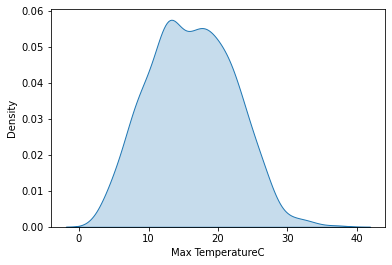

In [18]:
# Checking if the data is normally distributed.
sns.kdeplot(df['Max TemperatureC'],fill = True)

In [19]:
# Handling the outliers
mean1 = df['Max TemperatureC'].mean()
print(mean1)
for val in outliers1:
    df['Max TemperatureC'].replace({val:mean1},inplace = True)

16.165671641791043


In [22]:
df['Max TemperatureC'].max()

33.0

<AxesSubplot:xlabel='Mean TemperatureC', ylabel='Density'>

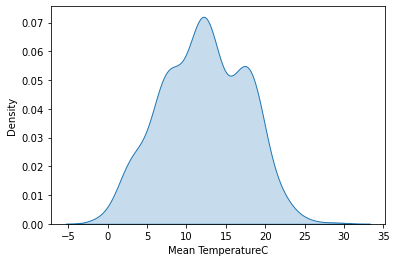

In [23]:
# Checking if the data is normally distributed.
sns.kdeplot(df['Mean TemperatureC'],fill = True)

In [24]:
#outlier detection by zscore method
threshold = 3
outliers2 = []

for xi in df['Mean TemperatureC']:
    z_score = (xi - df['Mean TemperatureC'].mean())/df['Mean TemperatureC'].std()
    if np.abs(z_score) > threshold:
        outliers2.append(xi)
        
print("Outliers are :",outliers2)
print(len(outliers2))

Outliers are : [29]
1


In [25]:
# Handling the outliers
mean2 = df['Mean TemperatureC'].mean()
print(mean2)
for val in outliers2:
    df['Mean TemperatureC'].replace({val:mean2},inplace = True)

12.146268656716417


In [28]:
df['Mean TemperatureC'].apply(lambda x: x * 5/9 ,df['Mean TemperatureC'] )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='Min TemperatureC', ylabel='Density'>

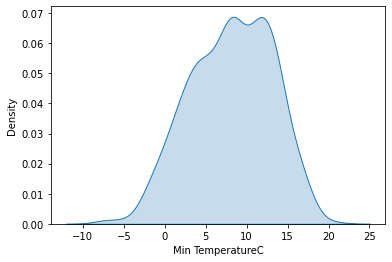

In [13]:
# Checking for the normality of data.
sns.kdeplot(df['Min TemperatureC'],fill = True)

In [14]:
#outlier detection by zscore method
threshold = 3
outliers3 = []

for xi in df['Min TemperatureC']:
    z_score = (xi - df['Min TemperatureC'].mean())/df['Min TemperatureC'].std()
    if np.abs(z_score) > threshold:
        outliers3.append(xi)
        
print("Outliers are :",outliers3)
print(len(outliers3))

Outliers are : [-7, -8]
2


In [15]:
# Handling the outliers.

mean3 = df['Min TemperatureC'].mean()
print(mean3)
for val in outliers3:
    df['Min TemperatureC'].replace({val:mean3},inplace = True)

8.097014925373134


In [16]:
#outlier detection by zscore method
threshold = 3
outliers4 = []

for xi in df['Dew PointC']:
    z_score = (xi - df['Dew PointC'].mean())/df['Dew PointC'].std()
    if np.abs(z_score) > threshold:
        outliers4.append(xi)
        
print("Outliers are :",outliers4)
print(len(outliers4))

Outliers are : []
0


In [17]:
#outlier detection by zscore method
threshold = 3
outliers5 = []

for xi in df['MeanDew PointC']:
    z_score = (xi - df['MeanDew PointC'].mean())/df['MeanDew PointC'].std()
    if np.abs(z_score) > threshold:
        outliers5.append(xi)
        
print("Outliers are :",outliers5)
print(len(outliers5))

Outliers are : []
0


In [18]:
#outlier detection by zscore method
threshold = 3
outliers6 = []

for xi in df['Min DewpointC']:
    z_score = (xi - df['Min DewpointC'].mean())/df['Min DewpointC'].std()
    if np.abs(z_score) > threshold:
        outliers6.append(xi)
        
print("Outliers are :",outliers6)
print(len(outliers6))

Outliers are : []
0


In [19]:
#outlier detection by zscore method
threshold = 3
outliers7 = []

for xi in df['Max Humidity']:
    z_score = (xi - df['Max Humidity'].mean())/df['Max Humidity'].std()
    if np.abs(z_score) > threshold:
        outliers7.append(xi)
        
print("Outliers are :",outliers7)
print(len(outliers7))

Outliers are : [71, 67, 65, 71, 72]
5


In [20]:
#Handling the outliers

mean7= df['Max Humidity'].mean()
print(mean7)
for val in outliers7:
    df['Max Humidity'].replace({val:mean7},inplace = True)

93.38805970149254


In [21]:
#outlier detection by zscore method
threshold = 3
outliers8 = []

for xi in df[' Mean Humidity']:
    z_score = (xi - df[' Mean Humidity'].mean())/df[' Mean Humidity'].std()
    if np.abs(z_score) > threshold:
        outliers8.append(xi)
        
print("Outliers are :",outliers8)
print(len(outliers8))

Outliers are : [40]
1


In [22]:
# Handling the outliers

mean8 = df[' Mean Humidity'].mean()
print(mean8)
for val in outliers8:
    df[' Mean Humidity'].replace({val:mean8},inplace = True)

72.98059701492538


In [23]:
#outlier detection by zscore method
threshold = 3
outliers9 = []

for xi in df[' Max Sea Level PressurehPa']:
    z_score = (xi - df[' Max Sea Level PressurehPa'].mean())/df[' Max Sea Level PressurehPa'].std()
    if np.abs(z_score) > threshold:
        outliers9.append(xi)
        
print("Outliers are :",outliers9)
print(len(outliers9))

Outliers are : [981, 984, 990, 987, 990]
5


In [24]:
# Handling the outliers

mean9 = df[' Max Sea Level PressurehPa'].mean()
print(mean9)
for val in outliers9:
    df[' Max Sea Level PressurehPa'].replace({val:mean9},inplace = True)

1019.6014925373134


In [25]:
#outlier detection by zscore method
threshold = 3
outliers10 = []

for xi in df[' Mean Sea Level PressurehPa']:
    z_score = (xi - df[' Mean Sea Level PressurehPa'].mean())/df[' Mean Sea Level PressurehPa'].std()
    if np.abs(z_score) > threshold:
        outliers10.append(xi)
        
print("Outliers are :",outliers10)
print(len(outliers10))

Outliers are : [985, 979, 985, 983, 985, 985, 983, 987, 987]
9


In [26]:
# Handling the outliers

mean10 = df[' Mean Sea Level PressurehPa'].mean()
print(mean10)
for val in outliers10:
    df[' Mean Sea Level PressurehPa'].replace({val:mean10},inplace = True)

1016.0


In [27]:
#outlier detection by zscore method
threshold = 3
outliers11 = []

for xi in df[' Min Sea Level PressurehPa']:
    z_score = (xi - df[' Min Sea Level PressurehPa'].mean())/df[' Min Sea Level PressurehPa'].std()
    if np.abs(z_score) > threshold:
        outliers11.append(xi)
        
print("Outliers are :",outliers11)
print(len(outliers11))

Outliers are : [977, 975, 980, 980, 978, 974]
6


In [28]:
# Handling the outliers

mean11 = df[' Min Sea Level PressurehPa'].mean()
print(mean11)
for val in outliers11:
    df[' Min Sea Level PressurehPa'].replace({val:mean1},inplace = True)

1012.676119402985


In [29]:
#outlier detection by zscore method
threshold = 3
outliers12 = []

for xi in df[' Max VisibilityKm']:
    z_score = (xi - df[' Max VisibilityKm'].mean())/df[' Max VisibilityKm'].std()
    if np.abs(z_score) > threshold:
        outliers12.append(xi)
        
print("Outliers are :",outliers12)
print(len(outliers12))

Outliers are : [13, 11, 11, 10, 10, 7, 8, 14, 14, 10, 10, 5, 5, 14, 14, 14, 14, 13, 8, 10, 11, 11, 10, 14]
24


In [30]:
# Handling the outliers

mean12 = df[' Min Sea Level PressurehPa'].mean()
print(mean12)
for val in outliers12:
    df[' Min Sea Level PressurehPa'].replace({val:mean12},inplace = True)

1004.0686478057473


In [31]:
#outlier detection by zscore method
threshold = 3
outliers13 = []

for xi in df[' Mean VisibilityKm']:
    z_score = (xi - df[' Mean VisibilityKm'].mean())/df[' Mean VisibilityKm'].std()
    if np.abs(z_score) > threshold:
        outliers13.append(xi)
        
print("Outliers are :",outliers13)
print(len(outliers13))

Outliers are : [4, 3, 22, 23, 22, 23, 24, 23, 24, 1, 1, 4, 3, 2, 3]
15


In [32]:
#Handling the outliers

mean13 = df[' Mean VisibilityKm'].mean()
print(mean13)
for val in outliers13:
    df[' Mean VisibilityKm'].replace({val:mean13},inplace = True)

12.67313432835821


In [33]:
#outlier detection by zscore method
threshold = 3
outliers14 = []

for xi in df[' Max Wind SpeedKm/h']:
    z_score = (xi - df[' Max Wind SpeedKm/h'].mean())/df[' Max Wind SpeedKm/h'].std()
    if np.abs(z_score) > threshold:
        outliers14.append(xi)
        
print("Outliers are :",outliers14)
print(len(outliers14))

Outliers are : [61, 58, 55, 61, 58, 60, 66]
7


In [34]:
#Handling the outliers

mean14 = df[' Max Wind SpeedKm/h'].mean()
print(mean14)
for val in outliers14:
    df[' Max Wind SpeedKm/h'].replace({val:mean14},inplace = True)

25.574626865671643


In [35]:
#outlier detection by zscore method
threshold = 3
outliers15 = []

for xi in df[' Mean Wind SpeedKm/h']:
    z_score = (xi - df[' Mean Wind SpeedKm/h'].mean())/df[' Mean Wind SpeedKm/h'].std()
    if np.abs(z_score) > threshold:
        outliers15.append(xi)
        
print("Outliers are :",outliers15)
print(len(outliers15))

Outliers are : [35, 34, 40, 34, 35, 35, 37, 34, 34, 39, 40]
11


In [36]:
#Handling the outliers

mean15 = df[' Mean Wind SpeedKm/h'].mean()
print(mean15)
for val in outliers15:
    df[' Mean Wind SpeedKm/h'].replace({val:mean15},inplace = True)

14.407462686567165


<AxesSubplot:xlabel='Precipitationmm', ylabel='Density'>

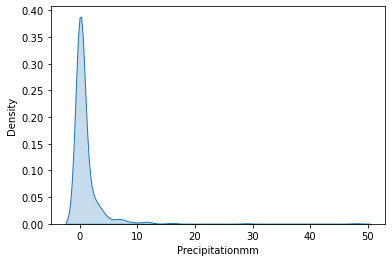

In [37]:
#Checking normality of data
sns.kdeplot(df['Precipitationmm'],fill = True)

#Data is not normally distributed. So, we will normalize the data first and will hadle the outliers.


In [38]:
# Normalization of data

normal_scale = MinMaxScaler()
normalized_array  = normal_scale.fit_transform(df[['Precipitationmm']])
df['Precipitationmm'] = pd.DataFrame(normalized_array)
df['Precipitationmm']

0      0.010623
1      0.000000
2      0.148094
3      0.000000
4      0.005207
         ...   
665    0.000000
666    0.000000
667    0.000000
668    0.000000
669    0.000000
Name: Precipitationmm, Length: 670, dtype: float64

<AxesSubplot:xlabel='Precipitationmm', ylabel='Density'>

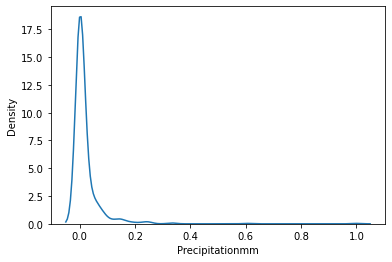

In [39]:
sns.kdeplot(df['Precipitationmm'])

In [40]:
#outlier detection by zscore method
threshold = 3
outliers16 = []

for xi in df['Precipitationmm']:
    z_score = (xi - df['Precipitationmm'].mean())/df['Precipitationmm'].std()
    if np.abs(z_score) > threshold:
        outliers16.append(xi)
        
print("Outliers are :",outliers16)
print(len(outliers16))

Outliers are : [0.24869818787752554, 0.24869818787752554, 0.6032076650697772, 0.24869818787752554, 1.0, 0.22745261403874195, 0.33326390335346806, 0.2064153301395543, 0.33326390335346806, 0.24869818787752554, 0.22745261403874195]
11


In [41]:
# Handling the outliers

mean16 = df['Precipitationmm'].mean()
print(mean16)
for val in outliers16:
    df['Precipitationmm'].replace({val:mean16},inplace = True)

0.020500704144347993


In [42]:
df['Precipitationmm'].value_counts()

0.000000    380
0.005207     84
0.010623     41
0.021246     39
0.042283     39
0.063528     27
0.084566     16
0.020501     11
0.015830     10
0.148094      8
0.105811      5
0.127057      5
0.185170      3
0.163924      2
Name: Precipitationmm, dtype: int64

In [43]:
#outlier detection by zscore method
threshold = 3
outliers17 = []

for xi in df[' CloudCover']:
    z_score = (xi - df[' CloudCover'].mean())/df[' CloudCover'].std()
    if np.abs(z_score) > threshold:
        outliers17.append(xi)
        
print("Outliers are :",outliers17)
print(len(outliers17))

Outliers are : []
0


In [44]:
#outlier detection by zscore method
threshold = 3
outliers18 = []

for xi in df['WindDirDegrees']:
    z_score = (xi - df['WindDirDegrees'].mean())/df['WindDirDegrees'].std()
    if np.abs(z_score) > threshold:
        outliers18.append(xi)
        
print("Outliers are :",outliers18)
print(len(outliers18))

Outliers are : []
0


In [ ]:
# Following features are having outliers>>

Max TemperatureC>>Outliers are : [37]
Mean TemperatureC>> Outliers are : [29]
Min TemperatureC>> Outliers are : [-7, -8]
Max Humidity>> Outliers are : [71, 67, 65, 71, 72]
Mean Humidity>> Outliers are : [40]
Max Sea Level PressurehPa>> Outliers are : [981, 984, 990, 987, 990]
Mean Sea Level PressurehPa>> Outliers are : [985, 979, 985, 983, 985, 985, 983, 987, 987]
Min Sea Level PressurehPa>> Outliers are : [977, 975, 980, 980, 978, 974] 
Max VisibilityKm>> Outliers are : [13, 11, 11, 10, 10, 7, 8, 14, 14, 10, 10, 5, 5, 14, 14, 14, 14, 13, 8, 10, 11, 11, 10, 14]
Mean VisibilityKm>> Outliers are : [4, 3, 22, 23, 22, 23, 24, 23, 24, 1, 1, 4, 3, 2, 3]
Max Wind SpeedKm/h>> Outliers are : [61, 58, 55, 61, 58, 60, 66]
Mean Wind SpeedKm/h>> Outliers are : [35, 34, 40, 34, 35, 35, 37, 34, 34, 39, 40]
Precipitationmm>> Outliers are : [11.94, 11.94, 28.96, 11.94, 48.01, 10.92, 16.0, 9.91, 16.0, 11.94, 10.92]
   

In [45]:
df['Max TemperatureC'].value_counts()

13.000000    51
19.000000    45
16.000000    44
14.000000    43
21.000000    40
18.000000    36
17.000000    36
12.000000    36
9.000000     33
11.000000    33
22.000000    32
24.000000    29
20.000000    25
23.000000    22
8.000000     22
7.000000     21
15.000000    20
10.000000    20
26.000000    17
27.000000    13
5.000000     12
25.000000    10
6.000000      8
4.000000      7
28.000000     3
33.000000     3
31.000000     3
29.000000     2
3.000000      2
16.165672     1
30.000000     1
Name: Max TemperatureC, dtype: int64

In [46]:
df.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

In [47]:
df['Mean TemperatureC'].value_counts()

 12.000000    60
 11.000000    50
 13.000000    50
 8.000000     48
 14.000000    47
 18.000000    43
 16.000000    40
 19.000000    40
 17.000000    38
 6.000000     36
 7.000000     34
 9.000000     30
 10.000000    28
 4.000000     22
 3.000000     19
 20.000000    18
 2.000000     13
 15.000000    12
 22.000000    10
 21.000000     8
 5.000000      6
 1.000000      6
 23.000000     4
-1.000000      3
 24.000000     2
 25.000000     1
 12.146269     1
 26.000000     1
Name: Mean TemperatureC, dtype: int64

In [48]:
df['Min TemperatureC'].value_counts()

 8.000000     56
 9.000000     55
 11.000000    55
 12.000000    50
 13.000000    45
 4.000000     45
 14.000000    45
 6.000000     39
 7.000000     37
 5.000000     32
 3.000000     31
 2.000000     30
 1.000000     24
 10.000000    23
 16.000000    19
 0.000000     16
 15.000000    16
-1.000000     14
 17.000000    14
-2.000000     10
 18.000000     4
-3.000000      4
 8.097015      2
-5.000000      1
 21.000000     1
-6.000000      1
 19.000000     1
Name: Min TemperatureC, dtype: int64

In [49]:
df['Dew PointC'].value_counts()

 12    64
 11    63
 8     49
 9     49
 13    47
 14    47
 10    45
 7     38
 6     33
 17    33
 15    30
 16    28
 3     27
 4     23
 18    23
 2     21
 5     17
 1     13
 0      6
 19     5
 21     3
-1      3
 20     2
-2      1
Name: Dew PointC, dtype: int64

## Feature Engineering

In [50]:
# Drop the features which are less important as per the above analysis.

df.drop('GMT',axis = 1,inplace = True)
df.drop(' Max Gust SpeedKm/h',axis = 1,inplace = True)
df.drop(' Events',axis = 1,inplace = True)

In [51]:
df.columns

Index(['Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', 'Precipitationmm',
       ' CloudCover', 'WindDirDegrees'],
      dtype='object')

In [52]:
# Filling the null values 

df[' CloudCover'].value_counts()

5.0    123
4.0    118
6.0    104
3.0     99
2.0     89
7.0     64
1.0     39
8.0     15
Name:  CloudCover, dtype: int64

In [53]:
mode = df[' CloudCover'].mode()[0]
df[' CloudCover'].fillna(mode, inplace = True)


In [54]:
df.isna().sum()

Max TemperatureC               0
Mean TemperatureC              0
Min TemperatureC               0
Dew PointC                     0
MeanDew PointC                 0
Min DewpointC                  0
Max Humidity                   0
 Mean Humidity                 0
 Min Humidity                  0
 Max Sea Level PressurehPa     0
 Mean Sea Level PressurehPa    0
 Min Sea Level PressurehPa     0
 Max VisibilityKm              0
 Mean VisibilityKm             0
 Min VisibilitykM              0
 Max Wind SpeedKm/h            0
 Mean Wind SpeedKm/h           0
Precipitationmm                0
 CloudCover                    0
WindDirDegrees                 0
dtype: int64

## Feature Selection

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Max TemperatureC             670 non-null    float64
 1   Mean TemperatureC            670 non-null    float64
 2   Min TemperatureC             670 non-null    float64
 3   Dew PointC                   670 non-null    int64  
 4   MeanDew PointC               670 non-null    int64  
 5   Min DewpointC                670 non-null    int64  
 6   Max Humidity                 670 non-null    float64
 7    Mean Humidity               670 non-null    float64
 8    Min Humidity                670 non-null    int64  
 9    Max Sea Level PressurehPa   670 non-null    float64
 10   Mean Sea Level PressurehPa  670 non-null    float64
 11   Min Sea Level PressurehPa   670 non-null    float64
 12   Max VisibilityKm            670 non-null    int64  
 13   Mean VisibilityKm  

In [56]:
df.corr()

Max TemperatureC  Mean TemperatureC  \
Max TemperatureC                     1.000000           0.964763   
Mean TemperatureC                    0.964763           1.000000   
Min TemperatureC                     0.835704           0.934592   
Dew PointC                           0.788569           0.863229   
MeanDew PointC                       0.787513           0.874394   
Min DewpointC                        0.716458           0.817372   
Max Humidity                        -0.111191          -0.086315   
 Mean Humidity                      -0.409045          -0.299672   
 Min Humidity                       -0.412793          -0.279397   
 Max Sea Level PressurehPa           0.005446          -0.051180   
 Mean Sea Level PressurehPa          0.052704          -0.002213   
 Min Sea Level PressurehPa           0.138768           0.137500   
 Max VisibilityKm                    0.195802           0.169044   
 Mean VisibilityKm                   0.181123           0.115627   
 Min VisibilitykM                    0.198730           0.133853   
 Max Wind SpeedKm/h                 -0.055188          -0.020613   
 Mean Wind SpeedKm/h                -0.105714          -0.032690   
Precipitationmm                     -0.066886          -0.015904   
 CloudCover                         -0.260951          -0.158231   
WindDirDegrees                       0.004002           0.001552   

                             Min TemperatureC  Dew PointC  MeanDew PointC  \
Max TemperatureC                     0.835704    0.788569        0.787513   
Mean TemperatureC                    0.934592    0.863229        0.874394   
Min TemperatureC                     1.000000    0.884643        0.906108   
Dew PointC                           0.884643    1.000000        0.958088   
MeanDew PointC                       0.906108    0.958088        1.000000   
Min DewpointC                        0.866140    0.869260        0.952972   
Max Humidity                        -0.028759    0.230184        0.222997   
 Mean Humidity                      -0.120365    0.114017        0.172722   
 Min Humidity                       -0.085509    0.092544        0.162585   
 Max Sea Level PressurehPa          -0.116995   -0.156161       -0.119467   
 Mean Sea Level PressurehPa         -0.067557   -0.136867       -0.086242   
 Min Sea Level PressurehPa           0.120081    0.100738        0.106525   
 Max VisibilityKm                    0.109176    0.082176        0.036707   
 Mean VisibilityKm                   0.002345   -0.091111       -0.130258   
 Min VisibilitykM                    0.031261   -0.162467       -0.140867   
 Max Wind SpeedKm/h                  0.016181    0.097135        0.001564   
 Mean Wind SpeedKm/h                 0.043395    0.085001        0.012593   
Precipitationmm                      0.045980    0.184398        0.149513   
 CloudCover                         -0.025571    0.068430        0.093489   
WindDirDegrees                      -0.010335    0.017548       -0.030055   

                             Min DewpointC  Max Humidity   Mean Humidity  \
Max TemperatureC                  0.716458     -0.111191       -0.409045   
Mean TemperatureC                 0.817372     -0.086315       -0.299672   
Min TemperatureC                  0.866140     -0.028759       -0.120365   
Dew PointC                        0.869260      0.230184        0.114017   
MeanDew PointC                    0.952972      0.222997        0.172722   
Min DewpointC                     1.000000      0.193800        0.212440   
Max Humidity                      0.193800      1.000000        0.671801   
 Mean Humidity                    0.212440      0.671801        1.000000   
 Min Humidity                     0.227618      0.458725        0.905386   
 Max Sea Level PressurehPa       -0.094042     -0.115000       -0.150867   
 Mean Sea Level PressurehPa      -0.048436     -0.137263       -0.183204   
 Min Sea Level PressurehPa        0.102899     -0.055876       -0.0911

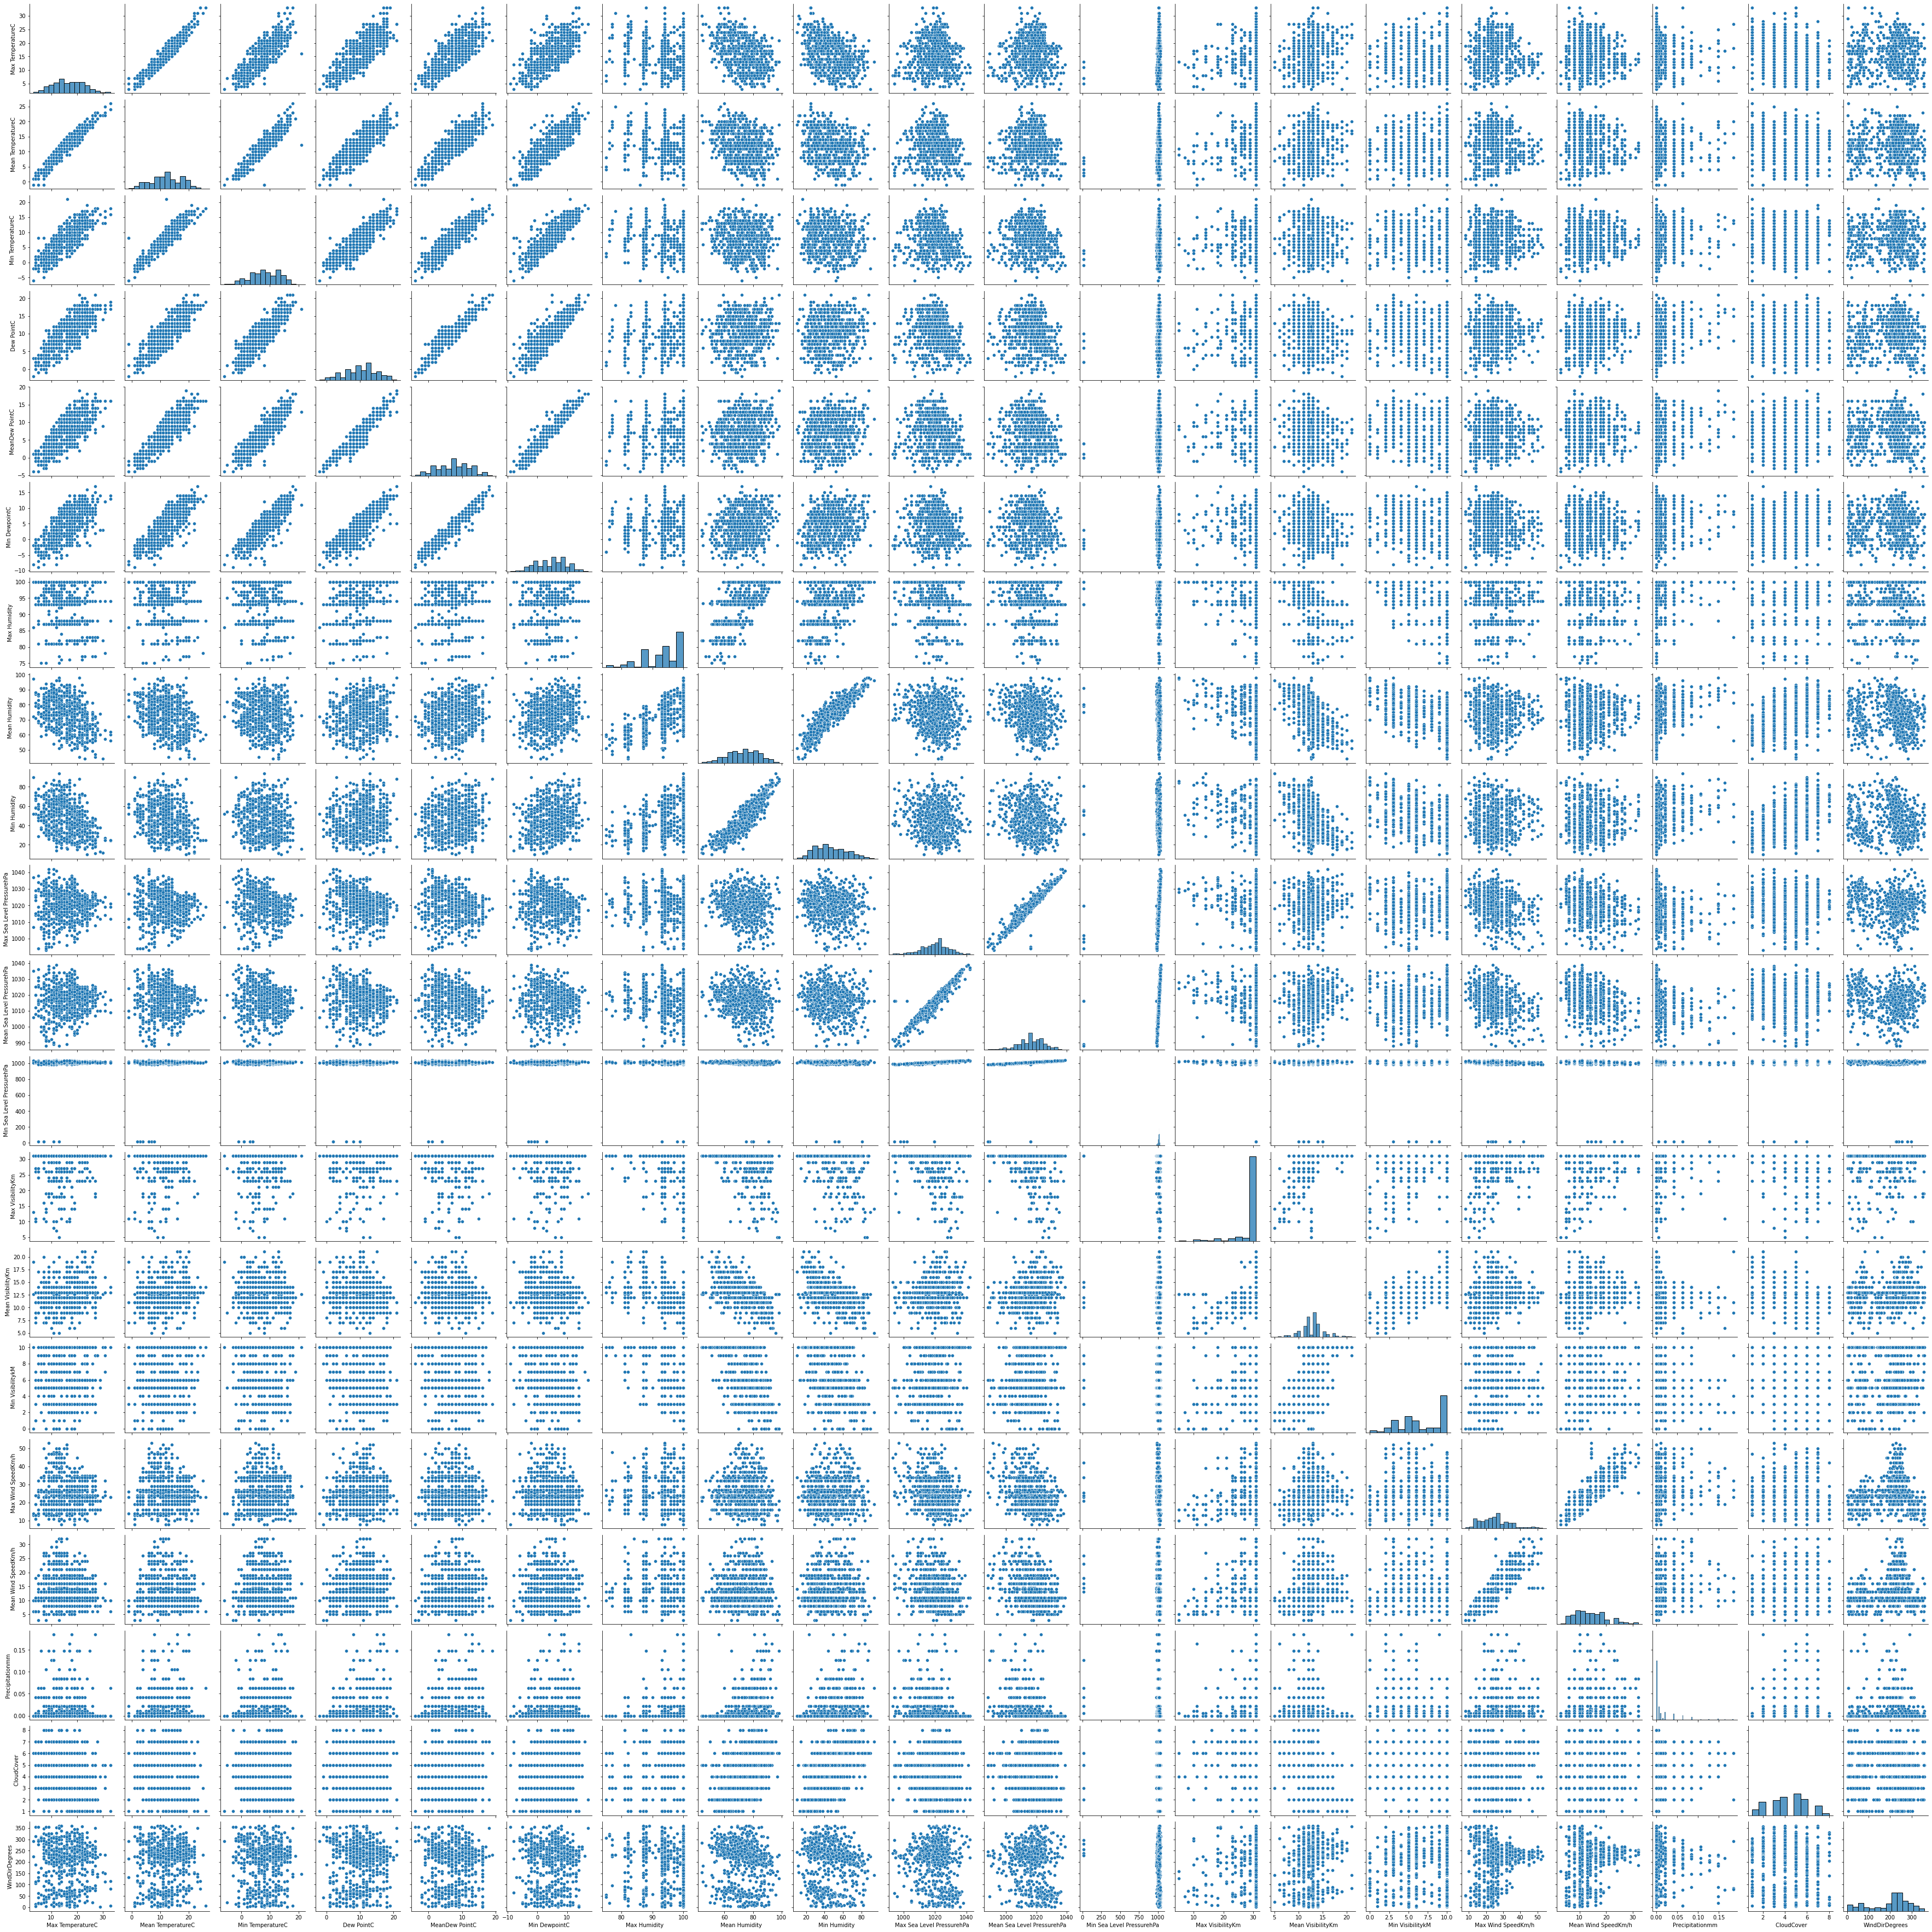

In [57]:
sns.pairplot(df)

<AxesSubplot:>

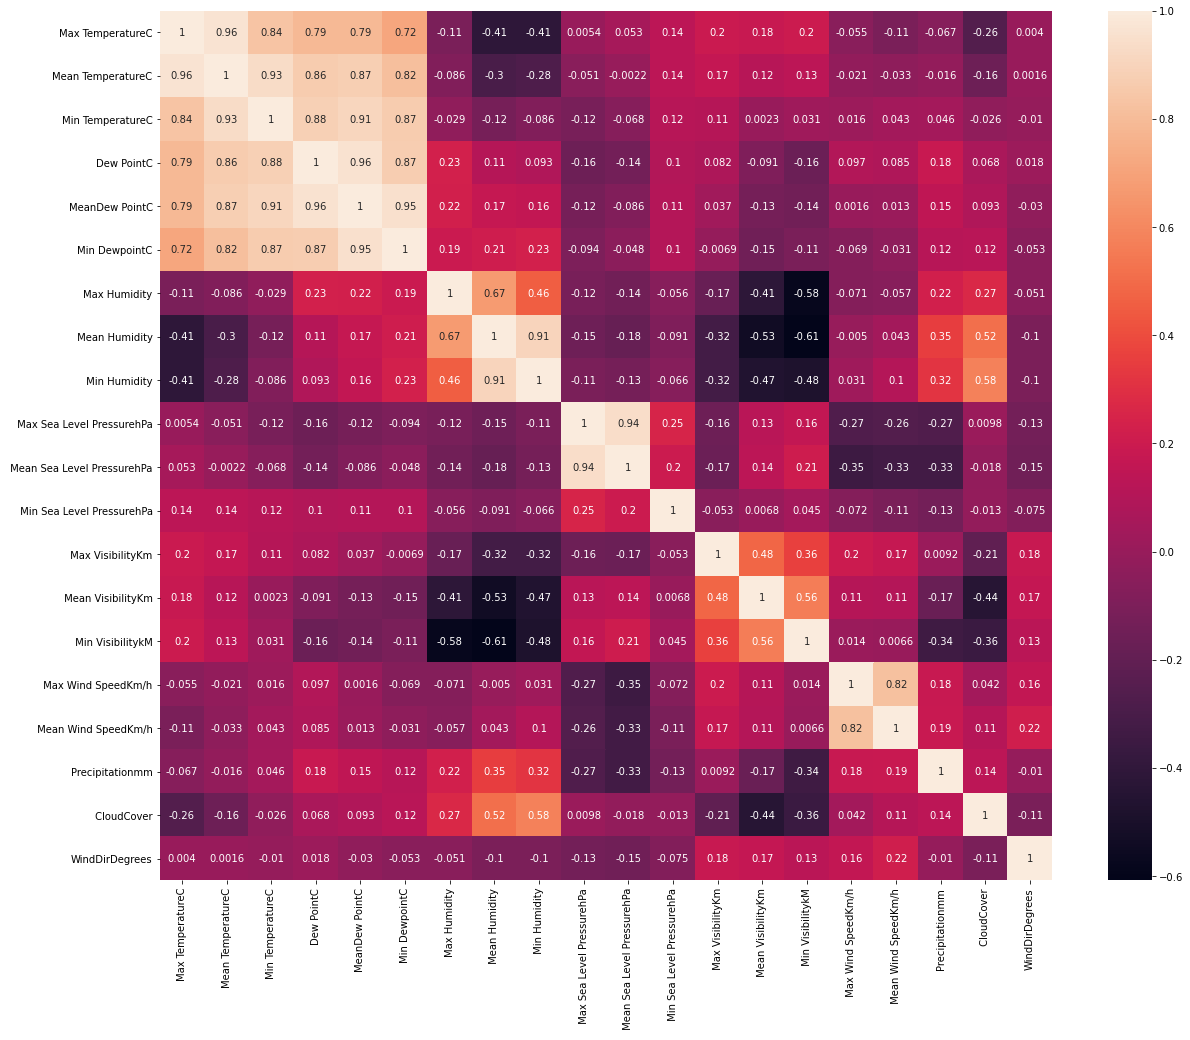

In [58]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

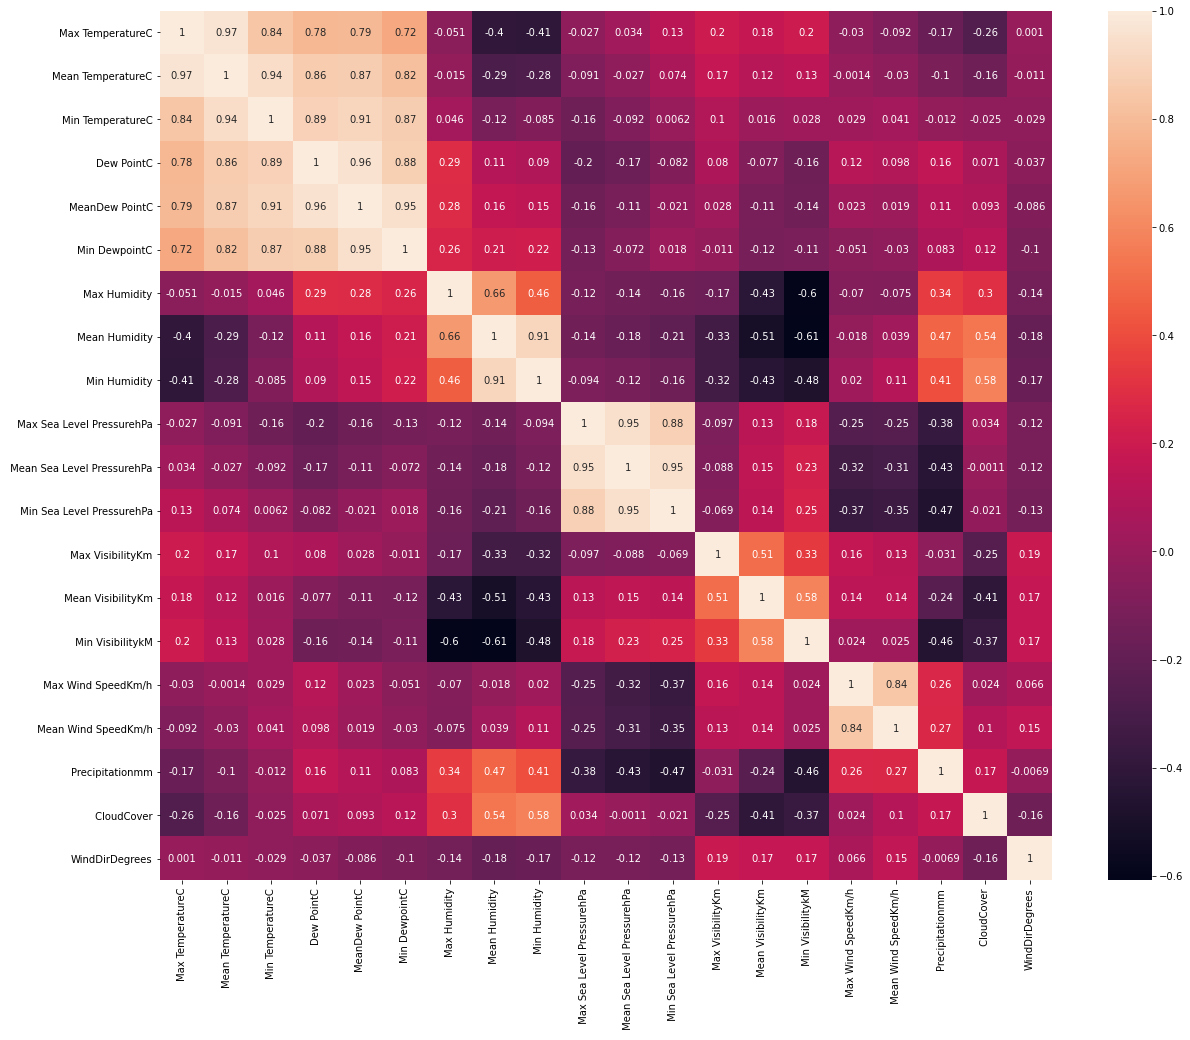

In [59]:
corr = df.corr(method='spearman')
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot = True)

In [60]:
#Features are having good correlation(R>=0.8)
def Correlation(df,threshold):
    col_corr=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.update({colname:corr_matrix})
    return col_corr

Correlation(df,0.8)

{' Mean Sea Level PressurehPa',
 ' Mean Wind SpeedKm/h',
 ' Min Humidity',
 'Dew PointC',
 'Mean TemperatureC',
 'MeanDew PointC',
 'Min DewpointC',
 'Min TemperatureC'}

In [61]:
#Features are having moderate correlation(0.8>R>=0.4)
def Correlation(df,upper,lower):
    col_corr=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= lower and abs(corr_matrix.iloc[i,j]) < upper:
                colname = corr_matrix.columns[i]
                col_corr.update({colname:corr_matrix})
    return col_corr

Correlation(df,0.8,0.4)

{' CloudCover',
 ' Mean Humidity',
 ' Mean VisibilityKm',
 ' Min Humidity',
 ' Min VisibilitykM',
 'Dew PointC',
 'MeanDew PointC',
 'Min DewpointC'}

In [62]:
#Features are having positive bad correlation(0.4>R>=0)
def Correlation(df,upper,lower):
    col_corr=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= lower and abs(corr_matrix.iloc[i,j]) < upper:
                colname = corr_matrix.columns[i]
                col_corr.update({colname:corr_matrix})
    return col_corr

Correlation(df,0.4,0)

{' CloudCover',
 ' Max Sea Level PressurehPa',
 ' Max VisibilityKm',
 ' Max Wind SpeedKm/h',
 ' Mean Humidity',
 ' Mean Sea Level PressurehPa',
 ' Mean VisibilityKm',
 ' Mean Wind SpeedKm/h',
 ' Min Humidity',
 ' Min Sea Level PressurehPa',
 ' Min VisibilitykM',
 'Max Humidity',
 'Precipitationmm',
 'WindDirDegrees'}

In [63]:
#Features are having negative bad correlation(0>R>=-0.3)
def Correlation(df,upper,lower):
    col_corr=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) >= lower and (corr_matrix.iloc[i,j]) < upper:
                colname = corr_matrix.columns[i]
                col_corr.update({colname:corr_matrix})
    return col_corr

Correlation(df,0,-0.3)

{' CloudCover',
 ' Max Sea Level PressurehPa',
 ' Max VisibilityKm',
 ' Max Wind SpeedKm/h',
 ' Mean Humidity',
 ' Mean Sea Level PressurehPa',
 ' Mean VisibilityKm',
 ' Mean Wind SpeedKm/h',
 ' Min Humidity',
 ' Min Sea Level PressurehPa',
 ' Min VisibilitykM',
 'Max Humidity',
 'Precipitationmm',
 'WindDirDegrees'}

In [64]:
# Feature selection using Variance Threshold Method

from sklearn.feature_selection import VarianceThreshold
var_th = VarianceThreshold(threshold=0.0)
var_th.fit_transform(df)
array1 = var_th.get_support()
index = np.where(array1 == False)[0]
col_names = df.columns[index]
col_names

Index([], dtype='object')

#### Splitting Dataset into training and testing

In [65]:
df_max = df

In [66]:
x_max = df_max.drop('Max TemperatureC',axis = 1)
y_max = df_max['Max TemperatureC']

In [67]:
x_max

Mean TemperatureC  Min TemperatureC  Dew PointC  MeanDew PointC  \
0                  8.0               4.0          11               7   
1                  7.0               4.0          12               4   
2                  4.0               2.0           6               3   
3                  1.0              -2.0           3               1   
4                  6.0               2.0           8               5   
..                 ...               ...         ...             ...   
665               12.0               8.0          11               9   
666               13.0              10.0          12              11   
667               13.0              11.0          13              12   
668               10.0               8.0          11              10   
669               13.0               8.0          12              11   

     Min DewpointC  Max Humidity   Mean Humidity   Min Humidity  \
0                3          94.0            88.0             78   
1                0          94.0            70.0             41   
2                1         100.0            91.0             70   
3               -2         100.0            97.0             90   
4                2         100.0            86.0             67   
..             ...           ...             ...            ...   
665              8         100.0            86.0             56   
666              9          94.0            79.0             63   
667             10         100.0            88.0             73   
668              7         100.0            96.0             82   
669              9         100.0            88.0             48   

      Max Sea Level PressurehPa   Mean Sea Level PressurehPa  \
0                        1033.0                       1027.0   
1                        1035.0                       1029.0   
2                        1033.0                       1024.0   
3                        1037.0                       1035.0   
4                        1034.0                       1029.0   
..                          ...                          ...   
665                      1033.0                       1032.0   
666                      1036.0                       1034.0   
667                      1036.0                       1034.0   
668                      1033.0                       1030.0   
669                      1029.0                       1027.0   

      Min Sea Level PressurehPa   Max VisibilityKm   Mean VisibilityKm  \
0                        1020.0                 18            9.000000   
1                        1019.0                 31           16.000000   
2                        1014.0                 31           10.000000   
3                        1031.0                 13           12.673134   
4                        1023.0                 31           10.000000   
..                          ...                ...                 ...   
665                      1031.0                 31            9.000000   
666                      1031.0                 31           14.000000   
667                      1032.0                 18            8.000000   
668                      1029.0                 10           12.673134   
669                      1026.0                 14           12.673134   

      Min VisibilitykM   Max Wind SpeedKm/h   Mean Wind SpeedKm/h  \
0                    5                 39.0                  21.0   
1                    3                 35.0                  24.0   
2                    2                 19.0                  10.0   
3                    0                 13.0                   6.0   
4                    3                 19.0                  10.0   
..                 ...                  ...                   ...   
665                  0                 24.0                  11.0   
666                  8                 24.0                  16.0   
667                  2                 10.0             

In [68]:
y_max

0      12.0
1      11.0
2       6.0
3       3.0
4      10.0
       ... 
665    16.0
666    17.0
667    15.0
668    12.0
669    19.0
Name: Max TemperatureC, Length: 670, dtype: float64

<AxesSubplot:>

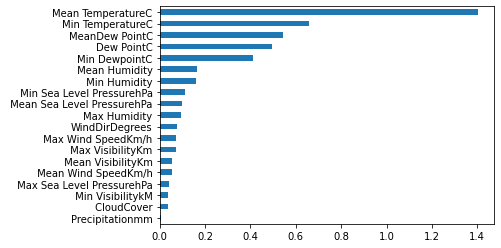

In [69]:
# Feature selection using Information Gain technique

from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
array2 = mutual_info_regression(x_max,y_max)
s2 = pd.Series(array2,index = x_max.columns)
s2.sort_values().plot(kind = 'barh')

In [70]:
# Feature selection using ANOVA test 

from sklearn.feature_selection import f_classif
f_val,p_val = f_classif(x_max,y_max)
df_annova = pd.DataFrame({'f_val':f_val,'p_val':np.around(p_val,3)},index = x_max.columns)
df_annova.sort_values('p_val')

f_val  p_val
Mean TemperatureC            321.629699  0.000
Min TemperatureC              59.185477  0.000
Dew PointC                    40.598193  0.000
MeanDew PointC                40.892736  0.000
Min DewpointC                 27.925429  0.000
 Mean Humidity                 6.135523  0.000
 Min Humidity                  6.820352  0.000
 CloudCover                    3.687227  0.000
 Mean Wind SpeedKm/h           2.062264  0.001
 Min Sea Level PressurehPa     2.055039  0.001
 Mean VisibilityKm             2.091168  0.001
 Min VisibilitykM              2.058020  0.001
 Max VisibilityKm              1.855102  0.004
 Max Wind SpeedKm/h            1.583448  0.026
WindDirDegrees                 1.475211  0.051
Max Humidity                   1.306674  0.129
Precipitationmm                1.083226  0.350
 Mean Sea Level PressurehPa    0.704498  0.880
 Max Sea Level PressurehPa     0.536353  0.981

In [71]:
x_train_max,x_test_max,y_train_max,y_test_max = train_test_split(x_max,y_max,test_size=0.25,random_state=23)

## Model Training 

### Model Training using Linear regression 

In [72]:
lin_reg_max = LinearRegression()
lin_reg_max.fit(x_train_max,y_train_max)

LinearRegression()

In [73]:
# Checking the best value of C
lin_reg_max.intercept_

4.021841606584976

In [74]:
# Checking the best value of m
lin_reg_max.coef_

array([ 1.24343016e+00, -6.94735172e-01,  6.34083598e-02,  4.25982688e-01,
        3.41969156e-02,  3.67466471e-03, -6.19911206e-02, -4.18982308e-02,
        1.38630453e-02, -7.75989032e-03, -5.00920299e-04, -5.78026966e-03,
       -1.16301825e-02,  8.79815421e-03,  9.88551172e-04, -2.29203236e-02,
        2.21610705e-01, -5.23693243e-02, -7.86895769e-04])

## Model Evaluation

In [75]:
# Model Evaluation using Testing data

y_pred_max = lin_reg_max.predict(x_test_max)

r2_max = r2_score(y_test_max,y_pred_max)
print('value of r2_score is: ',r2_max)

mse_max = mean_squared_error(y_test_max,y_pred_max)
print('value of mean_squared_error is: ',mse_max)

mae_max = mean_absolute_error(y_test_max,y_pred_max)
print('value of mean_absolute_error is: ',mae_max)

rmse_max = np.sqrt(mse_max)
print('value of root_mean_squared_error is: ',rmse_max)

value of r2_score is:  0.9329561842957518
value of mean_squared_error is:  2.3851839863452517
value of mean_absolute_error is:  0.790962856512265
value of root_mean_squared_error is:  1.5444040877779532


In [76]:
# Model Evaluation using training data

y_pred_train_max = lin_reg_max.predict(x_train_max)

r2_max = r2_score(y_train_max,y_pred_train_max)
print('value of r2_score is: ',r2_max)

mse_max = mean_squared_error(y_train_max,y_pred_train_max)
print('value of mean_squared_error is: ',mse_max)

mae_max = mean_absolute_error(y_train_max,y_pred_train_max)
print('value of mean_absolute_error is: ',mae_max)

rmse_max = np.sqrt(mse_max)
print('value of root_mean_squared_error is: ',rmse_max)

value of r2_score is:  0.9850645533884836
value of mean_squared_error is:  0.5246920158828169
value of mean_absolute_error is:  0.5598392900716963
value of root_mean_squared_error is:  0.7243562768988869


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Max TemperatureC'>

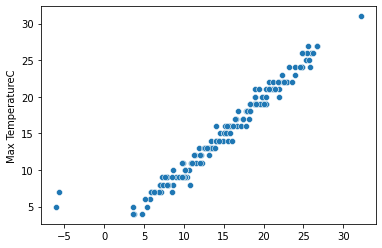

In [77]:
sns.scatterplot(y_pred_max,y_test_max,ci=95)

###### From the above scatter plot we can see that our features are linearly corelated with each other.

In [78]:
df_max['Max TemperatureC'].value_counts()

13.000000    51
19.000000    45
16.000000    44
14.000000    43
21.000000    40
18.000000    36
17.000000    36
12.000000    36
9.000000     33
11.000000    33
22.000000    32
24.000000    29
20.000000    25
23.000000    22
8.000000     22
7.000000     21
15.000000    20
10.000000    20
26.000000    17
27.000000    13
5.000000     12
25.000000    10
6.000000      8
4.000000      7
28.000000     3
33.000000     3
31.000000     3
29.000000     2
3.000000      2
16.165672     1
30.000000     1
Name: Max TemperatureC, dtype: int64

In [80]:
df.shape

(670, 20)

##### Feature Selection using Forward Feature Selection Technique

In [135]:
# Accuracy on training data
from sklearn.feature_selection import SequentialFeatureSelector

for i in range(10,19):
    sfs = SequentialFeatureSelector(lin_reg_max,direction='forward',n_features_to_select=i,cv=7)
    sfs.fit(x_max,y_max)
    sfs.get_support()
    feature = x_max.columns[np.where(sfs.get_support()==True)]
    lin_reg_max.fit(x_train_max[feature],y_train_max)
    acc_list = lin_reg_max.score(x_train_max[feature],y_train_max)
    print(acc_list)
# s3 = pd.Series(sfs.get_support(),index = x_max.columns)
# print(sfs.get_support())

0.984762751810571
0.9848286044672812
0.9849728346983361
0.9849742780052935
0.9849825069438297
0.9850037503889175
0.9850042429334319
0.9850043558861346
0.985014018748356


In [110]:
# Accuracy on testing data
from sklearn.feature_selection import SequentialFeatureSelector

for i in range(10,19):
    sfs = SequentialFeatureSelector(lin_reg_max,direction='forward',n_features_to_select=i,cv=7)
    sfs.fit(x_max,y_max)
    sfs.get_support()
    feature = x_max.columns[np.where(sfs.get_support()==True)]
    lin_reg_max.fit(x_test_max[feature],y_test_max)
    acc_list = lin_reg_max.score(x_test_max[feature],y_test_max)
    print(acc_list)
# s3 = pd.Series(sfs.get_support(),index = x_max.columns)
# print(sfs.get_support())

0.9605748682446044
0.961481843401568
0.9614845349323108
0.9623591223065994
0.9625560642823088
0.962969807661849
0.9632642647563295
0.9634859835197925
0.9638750903774198


##### Feature Selection using Backward Feature Selection Technique



In [116]:
#Accuracy score for testing data
for i in range(18,10,-1):
    bsfs = SequentialFeatureSelector(lin_reg_max,n_features_to_select=i,direction = 'backward',cv = 5)
    bsfs.fit(x_max,y_max)
    bsfs.get_support()
    feature = x_max.columns[np.where(sfs.get_support()==True)]
    lin_reg_max.fit(x_test_max[feature],y_test_max)
    acc_list = lin_reg_max.score(x_test_max[feature],y_test_max)
    print(acc_list)
    
# print(bsfs.get_support())

0.9638750903774198
0.9638750903774198
0.9638750903774198
0.9638750903774198
0.9638750903774198
0.9638750903774198
0.9638750903774198
0.9638750903774198


In [115]:
#Accuracy on training data
for i in range(18,10,-1):
    bsfs = SequentialFeatureSelector(lin_reg_max,n_features_to_select=i,direction = 'backward',cv = 5)
    bsfs.fit(x_max,y_max)
    bsfs.get_support()
    feature = x_max.columns[np.where(sfs.get_support()==True)]
    lin_reg_max.fit(x_train_max[feature],y_train_max)
    acc_list = lin_reg_max.score(x_train_max[feature],y_train_max)
    print(acc_list)
    
# print(bsfs.get_support())

0.985014018748356
0.985014018748356
0.985014018748356
0.985014018748356
0.985014018748356
0.985014018748356
0.985014018748356
0.985014018748356


### 3. Checking Normality of Residual

In [133]:
residual_train_data = y_train_max - y_pred_train_max
residual_train_data[:5]
max(residual_train_data)

4.535421186998802

<AxesSubplot:xlabel='Max TemperatureC', ylabel='Density'>

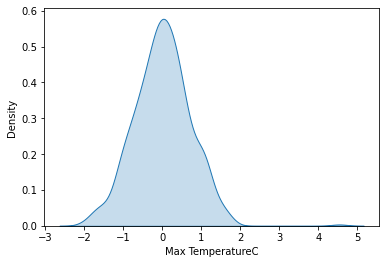

In [118]:
# 1. Kdeplot

sns.kdeplot(residual_train_data,fill=True)

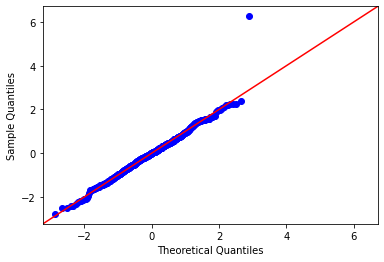

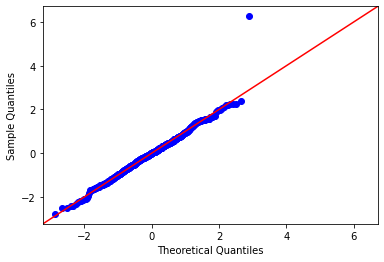

In [131]:
import scipy.stats as sts
import statsmodels.api as sm
# from statsmodels import qqplot

sm.qqplot(residual_train_data,line = '45',fit = True)

### 4. Homoscedasticity

<AxesSubplot:xlabel='Max TemperatureC', ylabel='Max TemperatureC'>

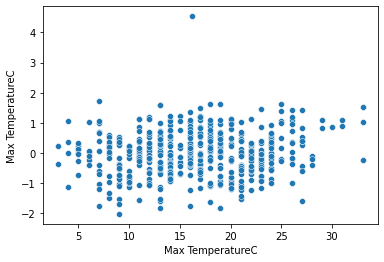

In [132]:
sns.scatterplot(x = y_train_max,y = residual_train_data)

In [78]:
# Converting the continuous dataframe into classification dataframe

In [79]:
df_max['Target'] = df_max['Max TemperatureC']

In [80]:
df_max.loc[df_max['Target']<=10,'Target'] = 0

In [81]:
df_max.loc[(df_max["Target"]>10) & (df_max["Target"]<=20),"Target"]=1

In [82]:
df_max.loc[df_max["Target"]>20 ,"Target"]=2

In [83]:
df_max

Max TemperatureC  Mean TemperatureC  Min TemperatureC  Dew PointC  \
0                12.0                8.0               4.0          11   
1                11.0                7.0               4.0          12   
2                 6.0                4.0               2.0           6   
3                 3.0                1.0              -2.0           3   
4                10.0                6.0               2.0           8   
..                ...                ...               ...         ...   
665              16.0               12.0               8.0          11   
666              17.0               13.0              10.0          12   
667              15.0               13.0              11.0          13   
668              12.0               10.0               8.0          11   
669              19.0               13.0               8.0          12   

     MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0                 7              3          94.0            88.0   
1                 4              0          94.0            70.0   
2                 3              1         100.0            91.0   
3                 1             -2         100.0            97.0   
4                 5              2         100.0            86.0   
..              ...            ...           ...             ...   
665               9              8         100.0            86.0   
666              11              9          94.0            79.0   
667              12             10         100.0            88.0   
668              10              7         100.0            96.0   
669              11              9         100.0            88.0   

      Min Humidity   Max Sea Level PressurehPa  ...  \
0               78                      1033.0  ...   
1               41                      1035.0  ...   
2               70                      1033.0  ...   
3               90                      1037.0  ...   
4               67                      1034.0  ...   
..             ...                         ...  ...   
665             56                      1033.0  ...   
666             63                      1036.0  ...   
667             73                      1036.0  ...   
668             82                      1033.0  ...   
669             48                      1029.0  ...   

      Min Sea Level PressurehPa   Max VisibilityKm   Mean VisibilityKm  \
0                        1020.0                 18            9.000000   
1                        1019.0                 31           16.000000   
2                        1014.0                 31           10.000000   
3                        1031.0                 13           12.673134   
4                        1023.0                 31           10.000000   
..                          ...                ...                 ...   
665                      1031.0                 31            9.000000   
666                      1031.0                 31           14.000000   
667                      1032.0                 18            8.000000   
668                      1029.0                 10           12.673134   
669                      1026.0                 14           12.673134   

      Min VisibilitykM   Max Wind SpeedKm/h   Mean Wind SpeedKm/h  \
0                    5                 39.0                  21.0   
1                    3                 35.0                  24.0   
2                    2                 19.0                  10.0   
3                    0                 13.0                   6.0   
4                    3                 19.0                  10.0   
..                 ...                  ...                   ...   
665                  0                 24.0                  11.0   
666                  8                 24.0                  16.0   
667                  2                 10.0                   5.0   
668                  0                 13.0                

In [84]:
x_max_clf=df_max.drop(["Target"],axis=1)
y_max_clf=df_max["Target"]

In [85]:
x_train_max2, x_test_max2, y_train_max2, y_test_max2 = train_test_split(x_max_clf,y_max_clf,test_size=0.2, random_state=1)

In [86]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(x_train_max2,y_train_max2)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(multi_class='ovr')

In [87]:
# Model Evaluation using testing data

y_pred_max2 = log_reg.predict(x_test_max2)

accuracy_max2 = accuracy_score(y_test_max2,y_pred_max2)
print('value of r2_score is: ',accuracy_max2)

clf_max2 = classification_report(y_test_max2,y_pred_max2)
print('value of mean_squared_error is: ',clf_max2)

conf_max2 = confusion_matrix(y_test_max2,y_pred_max2)
print('value of mean_absolute_error is: ',conf_max2)


value of r2_score is:  0.9104477611940298
value of mean_squared_error is:                precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        23
         1.0       0.95      0.91      0.93        88
         2.0       0.85      1.00      0.92        23

    accuracy                           0.91       134
   macro avg       0.88      0.91      0.89       134
weighted avg       0.91      0.91      0.91       134

value of mean_absolute_error is:  [[19  4  0]
 [ 4 80  4]
 [ 0  0 23]]


In [88]:
# Model Evaluation using training data

y_pred_train_max2 = log_reg.predict(x_train_max2)

accuracy_max2 = accuracy_score(y_train_max2,y_pred_train_max2)
print('value of accuracy_score is: ',accuracy_max2)

clf_max2 = classification_report(y_train_max2,y_pred_train_max2)
print('value of classification_report is: ',clf_max2)

conf_max2 = confusion_matrix(y_train_max2,y_pred_train_max2)
print('value of confusion_matrix is: ',conf_max2)


value of accuracy_score is:  0.9589552238805971
value of classification_report is:                precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       102
         1.0       0.95      0.97      0.96       282
         2.0       0.96      0.95      0.95       152

    accuracy                           0.96       536
   macro avg       0.96      0.95      0.96       536
weighted avg       0.96      0.96      0.96       536

value of confusion_matrix is:  [[ 96   6   0]
 [  2 274   6]
 [  0   8 144]]


In [90]:
df.columns

Index(['Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', 'Precipitationmm',
       ' CloudCover', 'WindDirDegrees', 'Target'],
      dtype='object')

In [99]:
df

Max TemperatureC  Mean TemperatureC  Min TemperatureC  Dew PointC  \
0                12.0                8.0               4.0          11   
1                11.0                7.0               4.0          12   
2                 6.0                4.0               2.0           6   
3                 3.0                1.0              -2.0           3   
4                10.0                6.0               2.0           8   
..                ...                ...               ...         ...   
665              16.0               12.0               8.0          11   
666              17.0               13.0              10.0          12   
667              15.0               13.0              11.0          13   
668              12.0               10.0               8.0          11   
669              19.0               13.0               8.0          12   

     MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0                 7              3          94.0            88.0   
1                 4              0          94.0            70.0   
2                 3              1         100.0            91.0   
3                 1             -2         100.0            97.0   
4                 5              2         100.0            86.0   
..              ...            ...           ...             ...   
665               9              8         100.0            86.0   
666              11              9          94.0            79.0   
667              12             10         100.0            88.0   
668              10              7         100.0            96.0   
669              11              9         100.0            88.0   

      Min Humidity   Max Sea Level PressurehPa  ...  \
0               78                      1033.0  ...   
1               41                      1035.0  ...   
2               70                      1033.0  ...   
3               90                      1037.0  ...   
4               67                      1034.0  ...   
..             ...                         ...  ...   
665             56                      1033.0  ...   
666             63                      1036.0  ...   
667             73                      1036.0  ...   
668             82                      1033.0  ...   
669             48                      1029.0  ...   

      Min Sea Level PressurehPa   Max VisibilityKm   Mean VisibilityKm  \
0                        1020.0                 18            9.000000   
1                        1019.0                 31           16.000000   
2                        1014.0                 31           10.000000   
3                        1031.0                 13           12.673134   
4                        1023.0                 31           10.000000   
..                          ...                ...                 ...   
665                      1031.0                 31            9.000000   
666                      1031.0                 31           14.000000   
667                      1032.0                 18            8.000000   
668                      1029.0                 10           12.673134   
669                      1026.0                 14           12.673134   

      Min VisibilitykM   Max Wind SpeedKm/h   Mean Wind SpeedKm/h  \
0                    5                 39.0                  21.0   
1                    3                 35.0                  24.0   
2                    2                 19.0                  10.0   
3                    0                 13.0                   6.0   
4                    3                 19.0                  10.0   
..                 ...                  ...                   ...   
665                  0                 24.0                  11.0   
666                  8                 24.0                  16.0   
667                  2                 10.0                   5.0   
668                  0                 13.0                

In [98]:
def get_weather_prediction(Max_TemperatureC, Mean_TemperatureC, Min_TemperatureC,
       Dew_PointC, MeanDew_PointC, Min_DewpointC, Max_Humidity,
        Mean_Humidity,  Min_Humidity,  Max_Sea_Level_PressurehPa,
        Mean_Sea_Level_PressurehPa,  Min_Sea_Level_PressurehPa,
        Max_VisibilityKm,  Mean_VisibilityKm,  Min_VisibilitykM,
        Max_Wind_SpeedKmph,  Mean_Wind_SpeedKmmh, Precipitationmm,
        CloudCover, WindDirDegrees):
    
    input_array = np.array([Max_TemperatureC, Mean_TemperatureC, Min_TemperatureC,
       Dew_PointC, MeanDew_PointC, Min_DewpointC, Max_Humidity,
        Mean_Humidity,  Min_Humidity,  Max_Sea_Level_PressurehPa,
        Mean_Sea_Level_PressurehPa,  Min_Sea_Level_PressurehPa,
        Max_VisibilityKm,  Mean_VisibilityKm,  Min_VisibilitykM,
        Max_Wind_SpeedKmph,  Mean_Wind_SpeedKmmh, Precipitationmm,
        CloudCover, WindDirDegrees],ndmin = 2)
    
    predicted_status = log_reg.predict(input_array)[0]
    
    return predicted_status

# 12.0	8.0	4.0	11	7	3	94.0,88.0,78,1033.0,1020.0,18,9.000000,5,39.0,21.0,0.010623	7.0	209	

Max_TemperatureC = 12
Mean_TemperatureC = 8
Min_TemperatureC = 4
Dew_PointC = 11
MeanDew_PointC = 7
Min_DewpointC = 3
Max_Humidity = 94
Mean_Humidity = 88
Min_Humidity = 78
Max_Sea_Level_PressurehPa = 1033
Mean_Sea_Level_PressurehPa = 1027
Min_Sea_Level_PressurehPa = 1020
Max_VisibilityKm = 18
Mean_VisibilityKm = 9
Min_VisibilitykM = 5
Max_Wind_SpeedKmph = 39
Mean_Wind_SpeedKmph = 21
Precipitationmm = 0.010623
CloudCover = 7
WindDirDegrees = 209

get_weather_prediction(Max_TemperatureC, Mean_TemperatureC, Min_TemperatureC,
       Dew_PointC, MeanDew_PointC, Min_DewpointC, Max_Humidity,
        Mean_Humidity,  Min_Humidity,  Max_Sea_Level_PressurehPa,
        Mean_Sea_Level_PressurehPa,  Min_Sea_Level_PressurehPa,
        Max_VisibilityKm,  Mean_VisibilityKm,  Min_VisibilitykM,
        Max_Wind_SpeedKmph,  Mean_Wind_SpeedKmph, Precipitationmm,
        CloudCover, WindDirDegrees)


1.0

In [100]:
import pickle
with open('weather_prediction.pkl','wb') as f:
    pickle.dump(log_reg,f)